<a href="https://colab.research.google.com/github/anmolsabharwal/RedDevils/blob/master/RD_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sqlite3
from google.colab import drive
import datetime
import plotly.figure_factory as ff


drive.mount('/content/drive')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
gws = sqlite3.connect('/content/drive/My Drive/fpl.db')
gws = pd.read_sql_query("SELECT * FROM gw",gws)
#gws1=pd.read_csv(io.StringIO(uploaded['gws.csv'].decode('utf-8')),sep=',')
gws.head()

,name,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,gw
0,Aaron Cresswell,0,0,0,0,0,454,10,0,0,0,0,2016-08-15T19:00:00Z,0,4,0,0,0,0,1,0,14023,1,2,0,0,0,0,0,55,FALSE,0,1
1,Aaron Lennon,0,0,6,0,0.3,142,3,0,0,0.9,8.2,2016-08-13T14:00:00Z,15,17,0,0,0,0,1,0,13918,1,1,0,1,0,0,0,60,TRUE,0,1
2,Aaron Ramsey,0,0,5,0,4.9,16,8,3,0,3,2.2,2016-08-14T15:00:00Z,60,9,0,0,0,0,1,0,163170,4,3,23,2,0,0,0,80,TRUE,0,1
3,Abdoulaye Doucour�,0,0,0,0,0,482,7,0,0,0,0,2016-08-13T14:00:00Z,0,13,0,0,0,0,1,0,1051,1,1,0,0,0,0,0,50,FALSE,0,1
4,Abdul Rahman Baba,0,0,0,0,0,80,10,0,0,0,0,2016-08-15T19:00:00Z,0,20,0,0,0,0,1,0,1243,1,2,0,0,0,0,0,55,TRUE,0,1


In [4]:
gws.columns

Index(['name', 'assists', 'bonus', 'bps', 'clean_sheets', 'creativity',
       'element', 'fixture', 'goals_conceded', 'goals_scored', 'ict_index',
       'influence', 'kickoff_time', 'minutes', 'opponent_team', 'own_goals',
       'penalties_missed', 'penalties_saved', 'red_cards', 'round', 'saves',
       'selected', 'team_a_score', 'team_h_score', 'threat', 'total_points',
       'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'was_home', 'yellow_cards', 'gw'],
      dtype='object')

In [5]:
gws=gws.astype({'name':'category','assists':int, 'bonus':int, 'bps':int, 'clean_sheets':'category',
       'creativity':float,'element':int,'goals_conceded':int,
       'goals_scored':int, 'ict_index':float, 'influence':float,'minutes':int, 'opponent_team':int, 'own_goals':int,'penalties_missed':int, 'penalties_saved':int,
       'red_cards':int, 'round':int, 'saves':int, 'selected':int,
        'team_a_score':int, 'team_h_score':int,'threat':float,
       'total_points':int, 'transfers_balance':int, 'transfers_in':int, 'transfers_out':int,
       'value':int, 'yellow_cards':int})

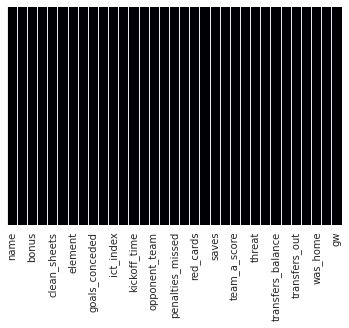

In [6]:
sns.set_style('dark')
sns.heatmap(gws.isnull(),yticklabels=False,cbar=False,cmap='inferno')

In [7]:
gws = gws.assign(id=(gws['name']).astype('category').cat.codes)


In [8]:
def fd(x):
  x=int(x)
  if x<=6:
    return '3'
  elif x>6 and x<=14:
    return '1'
  else:
    return '2'

In [9]:
gws.rename(columns={'opponent_team':'fdr'},inplace=True)


In [10]:
gws['fdr']=gws['fdr'].apply(fd).astype(float)


In [11]:
gws['kickoff_time']=pd.to_datetime(gws['kickoff_time'])

In [12]:
gws['kickoff_time'] = gws.kickoff_time.dt.hour


In [13]:
def time(x):
  x=int(x)
  if x>8 and x<=12:
    return '0'
  elif x>12 and x<=18:
    return '1'
  else:
    return '2'

In [14]:
gws['kickoff_time']=gws['kickoff_time'].apply(time).astype(float)
gws.head(20)

,name,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,fdr,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,gw,id
0,Aaron Cresswell,0,0,0,0,0.0,454,10,0,0,0.0,0.0,2.0,0,3.0,0,0,0,0,1,0,14023,1,2,0.0,0,0,0,0,55,FALSE,0,1,1
1,Aaron Lennon,0,0,6,0,0.3,142,3,0,0,0.9,8.2,1.0,15,2.0,0,0,0,0,1,0,13918,1,1,0.0,1,0,0,0,60,TRUE,0,1,2
2,Aaron Ramsey,0,0,5,0,4.9,16,8,3,0,3.0,2.2,1.0,60,1.0,0,0,0,0,1,0,163170,4,3,23.0,2,0,0,0,80,TRUE,0,1,5
3,Abdoulaye Doucour�,0,0,0,0,0.0,482,7,0,0,0.0,0.0,1.0,0,1.0,0,0,0,0,1,0,1051,1,1,0.0,0,0,0,0,50,FALSE,0,1,11
4,Abdul Rahman Baba,0,0,0,0,0.0,80,10,0,0,0.0,0.0,2.0,0,2.0,0,0,0,0,1,0,1243,1,2,0.0,0,0,0,0,55,TRUE,0,1,12
5,Abel Hern�ndez,1,0,10,0,12.2,163,4,1,0,5.7,14.4,0.0,90,1.0,0,0,0,0,1,0,26039,1,2,30.0,5,0,0,0,60,TRUE,0,1,13
6,Adama Diomande,0,2,29,0,16.8,164,4,1,1,10.7,45.2,0.0,90,1.0,0,0,0,0,1,0,38151,1,2,45.0,8,0,0,0,45,TRUE,0,1,28
7,Adam Clayton,0,0,6,0,2.2,283,6,1,0,1.4,3.2,1.0,90,1.0,0,0,0,0,1,0,17663,1,1,9.0,2,0,0,0,45,TRUE,0,1,16
8,Adam Federici,0,0,0,0,0.0,30,9,0,0,0.0,0.0,0.0,0,1.0,0,0,0,0,1,0,4315,3,1,0.0,0,0,0,0,45,TRUE,0,1,17
9,Adam Forshaw,0,0,3,0,1.3,286,6,1,0,0.3,2.0,1.0,69,1.0,0,0,0,0,1,0,2723,1,1,0.0,1,0,0,0,45,TRUE,1,1,18


In [15]:
def was_home(a):
  if a=="FALSE":
    #print('Away')
    return str('Away')
  else:
    #print('Home')
    return str('Home')

In [16]:
gws['home']=gws['was_home'].apply(was_home)

In [17]:
gws.drop(['element','fixture','round','transfers_balance','transfers_in','transfers_out','team_a_score','was_home',	'team_h_score','round'],axis=1, inplace=True)

In [18]:
gws['value']=gws['value']*0.1


In [19]:
def points(x):
  if x<=2:
    return 1
  elif x>2 and x<=7:
    return 2
  # elif x>5 and x<=7:
  #   return 3
  # elif x>7 and x<=10:
  #   return 4
  else:
    return 3


In [20]:
gws['points']=gws['total_points'].apply(points)
gws1=gws.copy()

In [21]:
gws1['Last_Week_Points'] = gws1.groupby(['id'])['points'].shift().astype(float)
gws1['Last_2_Week_Points'] = gws1.groupby(['id'])['points'].shift(2).astype(float)
#gws1['Last_3_Week_Points'] = gws1.groupby(['id'])['total_points'].shift(3).astype(float)
#gws1['Last_4_Week_Points'] = gws1.groupby(['id'])['total_points'].shift(4).astype(float)



gws1['Last_Week_Goals'] = gws1.groupby(['id'])['goals_scored'].shift().astype(float)
gws1['Last_2_Week_Goals'] = gws1.groupby(['id'])['goals_scored'].shift(2).astype(float)
#gws1['Last_3_Week_Goals'] = gws1.groupby(['id'])['goals_scored'].shift(3).astype(float)


gws1['Last_Week_ICT'] = gws1.groupby(['id'])['ict_index'].shift().astype(float)
gws1['Last_2_Week_ICT'] = gws1.groupby(['id'])['ict_index'].shift(2).astype(float)
# #gws1['Last_3_Week_ICT'] = gws1.groupby(['id'])['ict_index'].shift(3).astype(float)


gws1['Last_Week_BPS'] = gws1.groupby(['id'])['bps'].shift().astype(float)
gws1['Last_2_Week_BPS'] = gws1.groupby(['id'])['bps'].shift(2).astype(float)
#gws1['Last_3_Week_BPS'] = gws1.groupby(['id'])['bps'].shift(3).astype(float)


gws1['Last_Week_Assists'] = gws1.groupby(['id'])['assists'].shift().astype(float)
gws1['Last_2_Week_Assists'] = gws1.groupby(['id'])['assists'].shift(2).astype(float)
#gws1['Last_3_Week_Assists'] = gws1.groupby(['id'])['assists'].shift(3).astype(float)


gws1['Last_Week_Bonus'] = gws1.groupby(['id'])['bonus'].shift().astype(float)
gws1['Last_2_Week_Bonus'] = gws1.groupby(['id'])['bonus'].shift(2).astype(float)
#gws1['Last_3_Week_Bonus'] = gws1.groupby(['id'])['bonus'].shift(3).astype(float)


gws1['Last_Week_Influence'] = gws1.groupby(['id'])['influence'].shift().astype(float)
gws1['Last_2_Week_Influence'] = gws1.groupby(['id'])['influence'].shift(2).astype(float)
#gws1['Last_3_Week_Influence'] = gws1.groupby(['id'])['influence'].shift(3).astype(float)


gws1['Last_Week_Minutes_Played'] = gws1.groupby(['id'])['minutes'].shift().astype(float)
gws1['Last_2_Week_Minutes_Played'] = gws1.groupby(['id'])['minutes'].shift(2).astype(float)
#gws1['Last_3_Week_Minutes_Played'] = gws1.groupby(['id'])['minutes'].shift(3).astype(float)


gws1['Last_Week_Threat'] = gws1.groupby(['id'])['threat'].shift().astype(float)
gws1['Last_2_Week_Threat'] = gws1.groupby(['id'])['threat'].shift(2).astype(float)
# #gws1['Last_3_Week_Threat'] = gws1.groupby(['id'])['threat'].shift(3).astype(float)


gws1['Last_Week_Selected'] = gws1.groupby(['id'])['selected'].shift().astype(float)
gws1['Last_2_Week_Selected'] = gws1.groupby(['id'])['selected'].shift(2).astype(float)
#gws1['Last_3_Week_Selected'] = gws1.groupby(['id'])['selected'].shift(3).astype(float)


gws1['Last_Week_Value'] = gws1.groupby(['id'])['value'].shift().astype(float)
gws1['Last_2_Week_Value'] = gws1.groupby(['id'])['value'].shift(2).astype(float)
# gws1['Last_3_Week_Value'] = gws1.groupby(['id'])['value'].shift(3).astype(float)


gws1['Last_Week_Creativity'] = gws1.groupby(['id'])['creativity'].shift().astype(float)
gws1['Last_2_Week_Creativity'] = gws1.groupby(['id'])['creativity'].shift(2).astype(float)
# #gws1['Last_3_Week_Creativity'] = gws1.groupby(['id'])['creativity'].shift(3).astype(float)



gws1['Last_Week_FDR'] = gws1.groupby(['id'])['fdr'].shift().astype(float).astype(float)
gws1['Last_2_Week_FDR'] = gws1.groupby(['id'])['fdr'].shift(2).astype(float).astype(float)
gws1['Last_3_Week_FDR'] = gws1.groupby(['id'])['fdr'].shift(3).astype(float).astype(float)


gws1['Last_Week_Clean_Sheets'] = gws1.groupby(['id'])['clean_sheets'].shift().astype(float)
gws1['Last_2_Week_Clean_Sheets'] = gws1.groupby(['id'])['clean_sheets'].shift(2).astype(float)
#gws1['Last_3_Week_Clean_Sheets'] = gws1.groupby(['id'])['clean_sheets'].shift(3).astype(float)


gws1['Last_Week_Goals_Conceded'] = gws1.groupby(['id'])['goals_conceded'].shift().astype(float)
gws1['Last_2_Week_Goals_Conceded'] = gws1.groupby(['id'])['goals_conceded'].shift(2).astype(float)
#gws1['Last_3_Week_Goals_Conceded'] = gws1.groupby(['id'])['goals_conceded'].shift(3).astype(float)


# gws1['Last_Week_Kickoff_Time'] = gws1.groupby(['id'])['kickoff_time'].shift().astype(float)
# gws1['Last_2_Week_Kickoff_Time'] = gws1.groupby(['id'])['kickoff_time'].shift(2).astype(float)
# gws1['Last_3_Week_Kickoff_Time'] = gws1.groupby(['id'])['kickoff_time'].shift(3).astype(float)


gws1['Last_Week_Own_Goals'] = gws1.groupby(['id'])['own_goals'].shift().astype(float)
gws1['Last_2_Week_Own_Goals'] = gws1.groupby(['id'])['own_goals'].shift(2).astype(float)
# gws1['Last_3_Week_Own_Goals'] = gws1.groupby(['id'])['own_goals'].shift(3).astype(float)


gws1['Last_Week_Penalties_Missed'] = gws1.groupby(['id'])['penalties_missed'].shift().astype(float)
gws1['Last_2_Week_Penalties_Missed'] = gws1.groupby(['id'])['penalties_missed'].shift(2).astype(float)
# gws1['Last_3_Week_Penalties_Saved'] = gws1.groupby(['id'])['penalties_saved'].shift(3).astype(float)


gws1['Last_Week_Red_Cards'] = gws1.groupby(['id'])['red_cards'].shift().astype(float)
gws1['Last_2_Week_Red_Cards'] = gws1.groupby(['id'])['red_cards'].shift(2).astype(float)
# gws1['Last_3_Week_Red_Cards'] = gws1.groupby(['id'])['red_cards'].shift(3).astype(float)


gws1['Last_Week_Saves'] = gws1.groupby(['id'])['saves'].shift()
gws1['Last_2_Week_Saves'] = gws1.groupby(['id'])['saves'].shift(2)
#gws1['Last_3_Week_Saves'] = gws1.groupby(['id'])['saves'].shift(3)


gws1['Last_Week_Yellow_Cards'] = gws1.groupby(['id'])['yellow_cards'].shift()
gws1['Last_2_Week_Yellow_Cards'] = gws1.groupby(['id'])['yellow_cards'].shift(2)
# gws1['Last_3_Week_Yellow_Cards'] = gws1.groupby(['id'])['yellow_cards'].shift(3)


# gws1['Last_Week_Home'] = gws1.groupby(['id'])['home'].shift()
# gws1['Last_2_Week_Home'] = gws1.groupby(['id'])['home'].shift(2)
# gws1['Last_3_Week_Home'] = gws1.groupby(['id'])['home'].shift(3)


gws1.head(100)

,name,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,fdr,own_goals,penalties_missed,penalties_saved,red_cards,saves,selected,threat,total_points,value,yellow_cards,gw,id,home,points,Last_Week_Points,Last_2_Week_Points,Last_Week_Goals,Last_2_Week_Goals,Last_Week_ICT,Last_2_Week_ICT,Last_Week_BPS,Last_2_Week_BPS,Last_Week_Assists,Last_2_Week_Assists,Last_Week_Bonus,Last_2_Week_Bonus,Last_Week_Influence,Last_2_Week_Influence,Last_Week_Minutes_Played,Last_2_Week_Minutes_Played,Last_Week_Threat,Last_2_Week_Threat,Last_Week_Selected,Last_2_Week_Selected,Last_Week_Value,Last_2_Week_Value,Last_Week_Creativity,Last_2_Week_Creativity,Last_Week_FDR,Last_2_Week_FDR,Last_3_Week_FDR,Last_Week_Clean_Sheets,Last_2_Week_Clean_Sheets,Last_Week_Goals_Conceded,Last_2_Week_Goals_Conceded,Last_Week_Own_Goals,Last_2_Week_Own_Goals,Last_Week_Penalties_Missed,Last_2_Week_Penalties_Missed,Last_Week_Red_Cards,Last_2_Week_Red_Cards,Last_Week_Saves,Last_2_Week_Saves,Last_Week_Yellow_Cards,Last_2_Week_Yellow_Cards
0,Aaron Cresswell,0,0,0,0,0.0,0,0,0.0,0.0,2.0,0,3.0,0,0,0,0,0,14023,0.0,0,5.5,0,1,1,Away,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aaron Lennon,0,0,6,0,0.3,0,0,0.9,8.2,1.0,15,2.0,0,0,0,0,0,13918,0.0,1,6.0,0,1,2,Home,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aaron Ramsey,0,0,5,0,4.9,3,0,3.0,2.2,1.0,60,1.0,0,0,0,0,0,163170,23.0,2,8.0,0,1,5,Home,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Abdoulaye Doucour�,0,0,0,0,0.0,0,0,0.0,0.0,1.0,0,1.0,0,0,0,0,0,1051,0.0,0,5.0,0,1,11,Away,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Abdul Rahman Baba,0,0,0,0,0.0,0,0,0.0,0.0,2.0,0,2.0,0,0,0,0,0,1243,0.0,0,5.5,0,1,12,Home,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Christian Fuchs,0,0,17,0,13.8,2,0,5.6,25.4,0.0,90,1.0,0,0,0,0,0,418306,17.0,0,5.5,1,1,247,Away,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,Christian Kabasele,0,0,0,0,0.0,0,0,0.0,0.0,1.0,0,1.0,0,0,0,0,0,2810,0.0,0,5.0,0,1,248,Away,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,Chris Brunt,0,0,0,0,0.0,0,0,0.0,0.0,1.0,0,3.0,0,0,0,0,0,819,0.0,0,5.0,0,1,238,Away,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,Chris Long,0,0,0,0,0.0,0,0,0.0,0.0,1.0,0,2.0,0,0,0,0,0,35760,0.0,0,4.5,0,1,239,Home,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
home=pd.get_dummies(gws1['home'])
gws1=pd.concat([gws1,home],axis=1)
gws1.head()

,name,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,fdr,own_goals,penalties_missed,penalties_saved,red_cards,saves,selected,threat,total_points,value,yellow_cards,gw,id,home,points,Last_Week_Points,Last_2_Week_Points,Last_Week_Goals,Last_2_Week_Goals,Last_Week_ICT,Last_2_Week_ICT,Last_Week_BPS,Last_2_Week_BPS,Last_Week_Assists,Last_2_Week_Assists,Last_Week_Bonus,Last_2_Week_Bonus,Last_Week_Influence,Last_2_Week_Influence,Last_Week_Minutes_Played,Last_2_Week_Minutes_Played,Last_Week_Threat,Last_2_Week_Threat,Last_Week_Selected,Last_2_Week_Selected,Last_Week_Value,Last_2_Week_Value,Last_Week_Creativity,Last_2_Week_Creativity,Last_Week_FDR,Last_2_Week_FDR,Last_3_Week_FDR,Last_Week_Clean_Sheets,Last_2_Week_Clean_Sheets,Last_Week_Goals_Conceded,Last_2_Week_Goals_Conceded,Last_Week_Own_Goals,Last_2_Week_Own_Goals,Last_Week_Penalties_Missed,Last_2_Week_Penalties_Missed,Last_Week_Red_Cards,Last_2_Week_Red_Cards,Last_Week_Saves,Last_2_Week_Saves,Last_Week_Yellow_Cards,Last_2_Week_Yellow_Cards,Away,Home
0,Aaron Cresswell,0,0,0,0,0.0,0,0,0.0,0.0,2.0,0,3.0,0,0,0,0,0,14023,0.0,0,5.5,0,1,1,Away,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
1,Aaron Lennon,0,0,6,0,0.3,0,0,0.9,8.2,1.0,15,2.0,0,0,0,0,0,13918,0.0,1,6.0,0,1,2,Home,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
2,Aaron Ramsey,0,0,5,0,4.9,3,0,3.0,2.2,1.0,60,1.0,0,0,0,0,0,163170,23.0,2,8.0,0,1,5,Home,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
3,Abdoulaye Doucour�,0,0,0,0,0.0,0,0,0.0,0.0,1.0,0,1.0,0,0,0,0,0,1051,0.0,0,5.0,0,1,11,Away,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
4,Abdul Rahman Baba,0,0,0,0,0.0,0,0,0.0,0.0,2.0,0,2.0,0,0,0,0,0,1243,0.0,0,5.5,0,1,12,Home,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1


In [23]:
hpm =gws1.groupby('id',as_index=False)['total_points'].expanding().sum()/gws1.groupby('id',as_index=False)['Home'].expanding().sum()
gws1["Home Points"] = hpm.reset_index(level=0, drop=True)

apm =gws1.groupby('id',as_index=False)['total_points'].expanding().sum()/gws1.groupby('id',as_index=False)['Away'].expanding().sum()
gws1["Away Points"] = apm.reset_index(level=0, drop=True)

ppm =gws1.groupby('id',as_index=False)['total_points'].expanding().sum()/gws1.groupby('id',as_index=False)['minutes'].expanding().sum()*90
gws1["Points_90"] = ppm.reset_index(level=0, drop=True)

vm =gws1.groupby('id',as_index=False)['value'].expanding().sum()/gws1.groupby('id',as_index=False)['total_points'].expanding().sum()*90
gws1["Value_Point"] = vm.reset_index(level=0, drop=True)

apm =gws1.groupby('id',as_index=False)['assists'].expanding().sum()/gws1.groupby('id',as_index=False)['minutes'].expanding().sum()*90
gws1["Assists_90"] = ppm.reset_index(level=0, drop=True)

gpm =gws1.groupby('id',as_index=False)['goals_scored'].expanding().sum()/gws1.groupby('id',as_index=False)['minutes'].expanding().sum()*90
gws1["Goals_90"] = gpm.reset_index(level=0, drop=True)

ipm =gws1.groupby('id',as_index=False)['influence'].expanding().sum()/gws1.groupby('id',as_index=False)['minutes'].expanding().sum()*90
gws1["Influence_90"] = ipm.reset_index(level=0, drop=True)

bpm =gws1.groupby('id',as_index=False)['bps'].expanding().sum()/gws1.groupby('id',as_index=False)['minutes'].expanding().sum()*90
gws1["BPS_90"] = ipm.reset_index(level=0, drop=True)

ih =gws1.groupby('id',as_index=False)['influence'].expanding().sum()/gws1.groupby('id',as_index=False)['Home'].expanding().sum()
gws1["Home Influence"] = ih.reset_index(level=0, drop=True)

ah =gws1.groupby('id',as_index=False)['influence'].expanding().sum()/gws1.groupby('id',as_index=False)['Away'].expanding().sum()
gws1["Away Influence"] = ah.reset_index(level=0, drop=True)

hg =gws1.groupby('id',as_index=False)['goals_scored'].expanding().sum()/gws1.groupby('id',as_index=False)['Home'].expanding().sum()
gws1["Home Goals"] = hg.reset_index(level=0, drop=True)

ag =gws1.groupby('id',as_index=False)['goals_scored'].expanding().sum()/gws1.groupby('id',as_index=False)['Away'].expanding().sum()
gws1["Clean Sheets_90"] = ag.reset_index(level=0, drop=True)

cs =gws1.groupby('id',as_index=False)['clean_sheets'].expanding().sum()/gws1.groupby('id',as_index=False)['minutes'].expanding().sum()
gws1["Points_90"] = cs.reset_index(level=0, drop=True)

gc =gws1.groupby('id',as_index=False)['goals_conceded'].expanding().sum()/gws1.groupby('id',as_index=False)['minutes'].expanding().sum()
gws1["Goals_Conceded_90"] = gc.reset_index(level=0, drop=True)

s =gws1.groupby('id',as_index=False)['saves'].expanding().sum()/gws1.groupby('id',as_index=False)['minutes'].expanding().sum()
gws1["Saves_90"] = s.reset_index(level=0, drop=True)

sh =gws1.groupby('id',as_index=False)['saves'].expanding().sum()/gws1.groupby('id',as_index=False)['Home'].expanding().sum()
gws1["Saves Home"] = sh.reset_index(level=0, drop=True)

sa =gws1.groupby('id',as_index=False)['saves'].expanding().sum()/gws1.groupby('id',as_index=False)['Away'].expanding().sum()
gws1["Saves Away"] = sa.reset_index(level=0, drop=True)

ch =gws1.groupby('id',as_index=False)['creativity'].expanding().sum()/gws1.groupby('id',as_index=False)['Home'].expanding().sum()
gws1["Creativity Home"] = ch.reset_index(level=0, drop=True)

ca =gws1.groupby('id',as_index=False)['creativity'].expanding().sum()/gws1.groupby('id',as_index=False)['Away'].expanding().sum()
gws1["Creativity Away"] = ca.reset_index(level=0, drop=True)

csh =gws1.groupby('id',as_index=False)['clean_sheets'].expanding().sum()/gws1.groupby('id',as_index=False)['Home'].expanding().sum()
gws1["Clean Sheets Home"] = csh.reset_index(level=0, drop=True)

csa =gws1.groupby('id',as_index=False)['clean_sheets'].expanding().sum()/gws1.groupby('id',as_index=False)['Away'].expanding().sum()
gws1["Clean Sheets Away"] = csa.reset_index(level=0, drop=True)

bph =gws1.groupby('id',as_index=False)['bonus'].expanding().sum()/gws1.groupby('id',as_index=False)['Home'].expanding().sum()
gws1['Bonus Home'] = bph.reset_index(level=0, drop=True)

bpa =gws1.groupby('id',as_index=False)['bonus'].expanding().sum()/gws1.groupby('id',as_index=False)['Away'].expanding().sum()
gws1["Bonus Away"] = bpa.reset_index(level=0, drop=True)

icth =gws1.groupby('id',as_index=False)['ict_index'].expanding().sum()/gws1.groupby('id',as_index=False)['Home'].expanding().sum()
gws1['ICT Home'] = icth.reset_index(level=0, drop=True)

icta =gws1.groupby('id',as_index=False)['ict_index'].expanding().sum()/gws1.groupby('id',as_index=False)['Away'].expanding().sum()
gws1["ICT Away"] = icta.reset_index(level=0, drop=True)

ah =gws1.groupby('id',as_index=False)['assists'].expanding().sum()/gws1.groupby('id',as_index=False)['Home'].expanding().sum()
gws1['Assists Home'] = ah.reset_index(level=0, drop=True)

aa =gws1.groupby('id',as_index=False)['ict_index'].expanding().sum()/gws1.groupby('id',as_index=False)['Away'].expanding().sum()
gws1["Assists Away"] = aa.reset_index(level=0, drop=True)


In [24]:
def f(df):
    df['Goalstreak'] = (df['goals_scored'] > 0).cumsum()
    df['cumsum'] = np.nan
    df.loc[df['assists'] == 0, 'cumsum'] = df['Goalstreak']
    df['cumsum'] = df['cumsum'].fillna(method='ffill')
    df['cumsum'] = df['cumsum'].fillna(0)
    df['Goal Streak'] = df['Goalstreak'] - df['cumsum']
    df.drop(['Goalstreak', 'cumsum'], axis=1, inplace=True)
    df['Goal Streak']=df['Goal Streak'].shift(1)
    return df

In [25]:
gws1=gws1.groupby('id').apply(f)

In [26]:
# def f1(df):
#     df['Assiststreak'] = (df['assists'] > 0).cumsum()
#     df['cumsum'] = np.nan
#     df.loc[df['assists'] == 0, 'cumsum'] = df['Assiststreak']
#     df['cumsum'] = df['cumsum'].fillna(method='ffill')
#     df['cumsum'] = df['cumsum'].fillna(0)
#     df['Assist Streak'] = df['Assiststreak'] - df['cumsum']
#     df.drop(['Assiststreak', 'cumsum'], axis=1, inplace=True)
#     df['Assist Streak']=df['Assist Streak'].shift(1)
#     return df

In [27]:
# gws1=gws1.groupby('id').apply(f1)

In [28]:
# gws1 = gws1[gws1['minutes'] > 0] 


In [29]:
gws1=gws1.replace([np.inf, -np.inf], np.nan)

gws1=gws1.dropna()
gws1.head(100)

,name,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,fdr,own_goals,penalties_missed,penalties_saved,red_cards,saves,selected,threat,total_points,value,yellow_cards,gw,id,home,points,Last_Week_Points,Last_2_Week_Points,Last_Week_Goals,Last_2_Week_Goals,Last_Week_ICT,Last_2_Week_ICT,Last_Week_BPS,Last_2_Week_BPS,Last_Week_Assists,Last_2_Week_Assists,Last_Week_Bonus,Last_2_Week_Bonus,Last_Week_Influence,...,Last_2_Week_Goals_Conceded,Last_Week_Own_Goals,Last_2_Week_Own_Goals,Last_Week_Penalties_Missed,Last_2_Week_Penalties_Missed,Last_Week_Red_Cards,Last_2_Week_Red_Cards,Last_Week_Saves,Last_2_Week_Saves,Last_Week_Yellow_Cards,Last_2_Week_Yellow_Cards,Away,Home,Home Points,Away Points,Points_90,Value_Point,Assists_90,Goals_90,Influence_90,BPS_90,Home Influence,Away Influence,Home Goals,Clean Sheets_90,Goals_Conceded_90,Saves_90,Saves Home,Saves Away,Creativity Home,Creativity Away,Clean Sheets Home,Clean Sheets Away,Bonus Home,Bonus Away,ICT Home,ICT Away,Assists Home,Assists Away,Goal Streak
1721,Aaron Cresswell,0,0,13,0,2.8,3,0,1.3,8.4,1.0,90,2.0,0,0,0,0,0,16187,2.0,1,5.3,0,4,1,Away,1,1.0,1.0,0.0,0.0,2.0,1.3,13.0,12.0,0.0,0.0,0.0,0.0,14.4,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,4.000000,1.333333,0.00000,481.500000,1.333333,0.000000,9.400000,9.400000,28.200000,9.400000,0.0,0.0,0.022222,0.0,0.0,0.0,12.60,4.200000,0.0,0.0,0.0,0.0,4.600000,1.533333,0.0,1.533333,0.0
1722,Aaron Lennon,0,0,6,0,3.2,1,0,0.6,0.0,1.0,65,2.0,0,0,0,0,0,7501,4.0,2,5.6,0,4,2,Home,1,1.0,1.0,0.0,0.0,0.7,0.4,6.0,6.0,0.0,0.0,0.0,0.0,5.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1.666667,5.000000,0.00000,410.400000,3.913043,0.000000,13.304348,13.304348,5.666667,17.000000,0.0,0.0,0.017391,0.0,0.0,0.0,1.80,5.400000,0.0,0.0,0.0,0.0,0.866667,2.600000,0.0,2.600000,0.0
1723,Aaron Ramsey,0,0,-1,0,8.8,1,0,1.1,0.4,0.0,90,1.0,0,0,0,0,0,42010,2.0,1,7.6,1,4,5,Away,1,1.0,2.0,0.0,0.0,0.5,4.8,2.0,13.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,4.000000,4.000000,0.00000,346.500000,3.789474,0.000000,8.810526,8.810526,9.300000,9.300000,0.0,0.0,0.021053,0.0,0.0,0.0,18.95,18.950000,0.0,0.0,0.0,0.0,4.700000,4.700000,0.5,4.700000,0.0
1726,Abel Hern�ndez,0,0,0,0,0.0,0,0,0.0,0.0,1.0,0,2.0,0,0,0,0,0,48421,0.0,0,6.0,0,4,13,Away,1,1.0,1.0,0.0,0.0,0.3,5.5,3.0,3.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,4.000000,4.000000,0.00000,270.000000,3.829787,0.000000,7.085106,7.085106,7.400000,7.400000,0.0,0.0,0.015957,0.0,0.0,0.0,14.00,14.000000,0.0,0.0,0.0,0.0,5.750000,5.750000,0.5,5.750000,0.0
1727,Adama Diomande,0,0,0,0,0.0,0,0,0.0,0.0,1.0,0,2.0,0,0,0,0,0,220490,0.0,0,4.6,0,4,28,Away,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,4.000000,4.000000,0.00000,205.875000,8.000000,1.000000,45.200000,45.200000,22.600000,22.600000,0.5,0.5,0.011111,0.0,0.0,0.0,8.40,8.400000,0.0,0.0,1.0,1.0,5.350000,5.350000,0.0,5.350000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,Demarai Gray,0,0,0,0,0.8,0,0,0.2,0.0,1.0,23,2.0,0,0,0,0,0,23910,2.0,0,4.8,1,4,342,Away,1,1.0,1.0,0.0,0.0,1.9,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,6.000000,2.000000,0.00000,292.500000,4.736842,0.000000,3.473684,3.473684,4.400000,1.466667,0.0,0.0,0.026316,0.0,0.0,0.0,16.10,5.366667,0.0,0.0,0.0,0.0,4.300000,1.433333,1.0,1.433333,0.0
1880,Diafra Sakho,0,0,1,0,1.7,1,0,0.7,3.2,1.0,60,2.0,0,0,0,0,0,3171,2.0,2,5.8,0,4,349,Away,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,2.000000,0.666667,0.00000,1053.000000,3.000000,0.000000,4.800000,4.800000,3.200000,1.066667

In [30]:
c=gws1.corr().abs()
cor_target = c['total_points']
# relevant_features = cor_target[cor_target>0.3]
# relevant_features
pd.set_option('display.max_rows', None)
cor_target.sort_values(ascending=False)

total_points                    1.000000
points                          0.913670
bps                             0.901615
influence                       0.822255
bonus                           0.752080
ict_index                       0.746611
goals_scored                    0.664076
minutes                         0.610338
threat                          0.529645
creativity                      0.449431
assists                         0.448993
Away Points                     0.440403
Home Points                     0.433149
Last_Week_Minutes_Played        0.406591
Away Influence                  0.397400
Home Influence                  0.390220
ICT Away                        0.385341
Assists Away                    0.385341
ICT Home                        0.379133
Bonus Away                      0.374132
Bonus Home                      0.370012
Clean Sheets Away               0.360820
Last_2_Week_Minutes_Played      0.357383
Clean Sheets Home               0.355223
Last_Week_ICT   

In [31]:
gws1.var()

assists                         5.377652e-02
bonus                           2.783252e-01
bps                             1.081629e+02
creativity                      1.383187e+02
goals_conceded                  1.055031e+00
goals_scored                    6.254876e-02
ict_index                       1.074847e+01
influence                       1.909091e+02
kickoff_time                    2.793307e-01
minutes                         1.736442e+03
fdr                             6.897353e-01
own_goals                       1.648705e-03
penalties_missed                1.157557e-03
penalties_saved                 9.552855e-04
red_cards                       2.225905e-03
saves                           4.851731e-01
selected                        1.251867e+11
threat                          2.175596e+02
total_points                    7.051244e+00
value                           1.709091e+00
yellow_cards                    6.121572e-02
id                              1.504463e+05
points    

In [32]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score, RepeatedStratifiedKFold
from sklearn.metrics import mean_absolute_error,mean_squared_error, explained_variance_score,r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler,Binarizer,scale
from sklearn.pipeline import Pipeline


In [33]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,RandomForestClassifier
from sklearn.linear_model import LinearRegression,Ridge,Lasso,SGDRegressor, LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from collections import Counter
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import BaggingClassifier

X=gws1.drop(['name','points','total_points','ict_index','bps','goals_scored','assists','bonus','influence','minutes','threat','value','selected','creativity','own_goals','penalties_missed','penalties_saved','red_cards','yellow_cards','saves','selected','yellow_cards','clean_sheets','goals_conceded','home','id'],axis=1)
y=gws1['points']




/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



In [34]:
from imblearn.under_sampling import NearMiss

# define the undersampling method
undersample = NearMiss(version=1, n_neighbors=3)
# transform the dataset
X, y = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Counter({1: 3351, 2: 3351, 3: 3351})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [35]:
def evaluate_model(X, y, model):
	# define evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
# define models to test
def get_models():
	models, names = list(), list()
	# LR
	models.append(LogisticRegression(solver='lbfgs', multi_class='multinomial'))
	names.append('LR')
	# LDA
	models.append(LinearDiscriminantAnalysis())
	names.append('LDA')
	# KNN
	models.append(KNeighborsClassifier(n_neighbors=3))
	names.append('KNN')
	return models, names

>LR 0.772 (0.009)
>LDA 0.677 (0.009)
>KNN 0.621 (0.013)


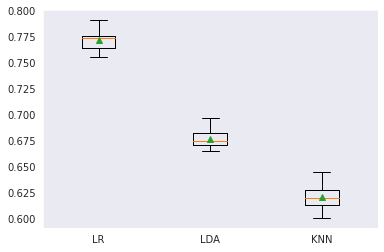

In [36]:
# define models
scaler=StandardScaler()
a=scaler.fit_transform(X)
models, names = get_models()
results = list()
# evaluate each model
for i in range(len(models)):
	# evaluate the model and store results
	scores = evaluate_model(a, y, models[i])
	results.append(scores)
	# summarize performance
	print('>%s %.3f (%.3f)' % (names[i], np.mean(scores), np.std(scores)))
# plot the results
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [37]:
# solvers = ['newton-cg', 'lbfgs']
# penalty = ['l2']
# c_values = [100, 10, 1.0, 0.1, 0.01]
# # define grid search
# grid = dict(solver=solvers,penalty=penalty,C=c_values)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(a, y)
# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

In [38]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=40)


In [39]:
scaler= StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
from sklearn.decomposition import PCA
pca = PCA(0.95)
pca.fit_transform(X_train)
X_train=pca.transform(X_train)
X_test=pca.transform(X_test)

In [40]:
# #List Hyperparameters that we want to tune.
# leaf_size = list(range(1,50))
# n_neighbors = list(range(1,30))
# p=[1,2]
# #Convert to dictionary
# hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
# #Create new KNN object
# knn_2 = KNeighborsClassifier()
# #Use GridSearch
# clf = GridSearchCV(knn_2, hyperparameters, cv=10)
# #Fit the model
# best_model = clf.fit(X,y)
# #Print The value of best Hyperparameters
# print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
# print('Best p:', best_model.best_estimator_.get_params()['p'])
# print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

In [41]:
#model=RandomForestClassifier()
#model=RandomForestRegressor()
#model=KNeighborsClassifier(leaf_size=1,p=2,n_neighbors=8)
model=LogisticRegression(C=1.0,solver='newton-cg',penalty='l2',max_iter=500)
#model=DecisionTreeClassifier()
#model=Lasso()
#model=Ridge()
#model=LinearRegression()
#model=sm.OLS(X_train,y_train)
#model=SGDRegressor(eta0=0.0001)
#model=LGBMRegressor()

# k_fold = KFold(n_splits=5)
# for train_indices, test_indices in k_fold.split(X):
#    print('Train: %s | test: %s' % (train_indices, test_indices))
 
# [model.fit(X_train, y_train).score(X_test, y_test)
# for train, test in k_fold.split(X)]
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# # #print(n_scores)
# print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
# # # fit the model on the whole dataset
# # #model = GradientBoostingRegressor()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
   predict=model.predict(X_test)


In [43]:
# predict = model.predict(X_test)
df=pd.DataFrame({'Actual':y_test,'Predicted':predict})
df.head(500)


,Actual,Predicted
0,3,3
1,3,3
2,2,2
3,1,1
4,3,3
5,2,1
6,2,3
7,3,1
8,3,3
9,3,3


In [44]:
from sklearn.metrics import classification_report, confusion_matrix,auc, roc_auc_score
print(classification_report(y_test,predict))
confusion_matrix(y_test,predict)

              precision    recall  f1-score   support

           1       0.73      0.83      0.78       964
           2       0.65      0.65      0.65      1020
           3       0.87      0.75      0.80      1032

    accuracy                           0.74      3016
   macro avg       0.75      0.74      0.74      3016
weighted avg       0.75      0.74      0.74      3016



array([[804, 151,   9],
       [246, 663, 111],
       [ 58, 204, 770]])

In [45]:
model.score(X_test,y_test)

0.741710875331565

In [46]:
x=pd.read_csv('/content/drive/My Drive/test3.csv')
x.head()

,name,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,gw
0,Aaron Cresswell,0.0,0.0,0.0,0.0,0.0,454.0,10.0,0.0,0.0,0.0,0.0,2016-08-15T19:00:00Z,0.0,4,0.0,0.0,0.0,0.0,1,0.0,14023.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,55.0,False,0.0,1
1,Aaron Lennon,0.0,0.0,6.0,0.0,0.3,142.0,3.0,0.0,0.0,0.9,8.2,2016-08-13T14:00:00Z,15.0,17,0.0,0.0,0.0,0.0,1,0.0,13918.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,60.0,True,0.0,1
2,Aaron Ramsey,0.0,0.0,5.0,0.0,4.9,16.0,8.0,3.0,0.0,3.0,2.2,2016-08-14T15:00:00Z,60.0,9,0.0,0.0,0.0,0.0,1,0.0,163170.0,4.0,3.0,23.0,2.0,0.0,0.0,0.0,80.0,True,0.0,1
3,Abdoulaye DoucourÈ,0.0,0.0,0.0,0.0,0.0,482.0,7.0,0.0,0.0,0.0,0.0,2016-08-13T14:00:00Z,0.0,13,0.0,0.0,0.0,0.0,1,0.0,1051.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,50.0,False,0.0,1
4,Abdul Rahman Baba,0.0,0.0,0.0,0.0,0.0,80.0,10.0,0.0,0.0,0.0,0.0,2016-08-15T19:00:00Z,0.0,20,0.0,0.0,0.0,0.0,1,0.0,1243.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,55.0,True,0.0,1


In [47]:
x=x.astype({'was_home':str})

In [48]:
x = x.assign(id=(x['name']).astype('category').cat.codes)


In [49]:
x.rename(columns={'opponent_team':'fdr'},inplace=True)


In [50]:
x['fdr']=x['fdr'].apply(fd).astype(float)


In [51]:
x['kickoff_time']=pd.to_datetime(x['kickoff_time'])

In [52]:
x['kickoff_time'] = x.kickoff_time.dt.hour

In [53]:
x['kickoff_time']=x['kickoff_time'].apply(time).astype(float)
x.head(20)

,name,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,fdr,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,gw,id
0,Aaron Cresswell,0.0,0.0,0.0,0.0,0.0,454.0,10.0,0.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,1,0.0,14023.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,55.0,False,0.0,1,1
1,Aaron Lennon,0.0,0.0,6.0,0.0,0.3,142.0,3.0,0.0,0.0,0.9,8.2,1.0,15.0,2.0,0.0,0.0,0.0,0.0,1,0.0,13918.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,60.0,True,0.0,1,2
2,Aaron Ramsey,0.0,0.0,5.0,0.0,4.9,16.0,8.0,3.0,0.0,3.0,2.2,1.0,60.0,1.0,0.0,0.0,0.0,0.0,1,0.0,163170.0,4.0,3.0,23.0,2.0,0.0,0.0,0.0,80.0,True,0.0,1,5
3,Abdoulaye DoucourÈ,0.0,0.0,0.0,0.0,0.0,482.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0.0,1051.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,50.0,False,0.0,1,10
4,Abdul Rahman Baba,0.0,0.0,0.0,0.0,0.0,80.0,10.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,1,0.0,1243.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,55.0,True,0.0,1,12
5,Abel Hern·ndez,1.0,0.0,10.0,0.0,12.2,163.0,4.0,1.0,0.0,5.7,14.4,0.0,90.0,1.0,0.0,0.0,0.0,0.0,1,0.0,26039.0,1.0,2.0,30.0,5.0,0.0,0.0,0.0,60.0,True,0.0,1,13
6,Adama Diomande,0.0,2.0,29.0,0.0,16.8,164.0,4.0,1.0,1.0,10.7,45.2,0.0,90.0,1.0,0.0,0.0,0.0,0.0,1,0.0,38151.0,1.0,2.0,45.0,8.0,0.0,0.0,0.0,45.0,True,0.0,1,28
7,Adam Clayton,0.0,0.0,6.0,0.0,2.2,283.0,6.0,1.0,0.0,1.4,3.2,1.0,90.0,1.0,0.0,0.0,0.0,0.0,1,0.0,17663.0,1.0,1.0,9.0,2.0,0.0,0.0,0.0,45.0,True,0.0,1,16
8,Adam Federici,0.0,0.0,0.0,0.0,0.0,30.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0.0,4315.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,45.0,True,0.0,1,17
9,Adam Forshaw,0.0,0.0,3.0,0.0,1.3,286.0,6.0,1.0,0.0,0.3,2.0,1.0,69.0,1.0,0.0,0.0,0.0,0.0,1,0.0,2723.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,45.0,True,1.0,1,18


In [54]:
def was__home(a):
  if a=='False':
    #print('Away')
    return str('Away')
  else:
    #print('Home')
    return str('Home')

In [55]:
x['home']=x['was_home'].apply(was__home)
x.head()

,name,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,fdr,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,gw,id,home
0,Aaron Cresswell,0.0,0.0,0.0,0.0,0.0,454.0,10.0,0.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,1,0.0,14023.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,55.0,False,0.0,1,1,Away
1,Aaron Lennon,0.0,0.0,6.0,0.0,0.3,142.0,3.0,0.0,0.0,0.9,8.2,1.0,15.0,2.0,0.0,0.0,0.0,0.0,1,0.0,13918.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,60.0,True,0.0,1,2,Home
2,Aaron Ramsey,0.0,0.0,5.0,0.0,4.9,16.0,8.0,3.0,0.0,3.0,2.2,1.0,60.0,1.0,0.0,0.0,0.0,0.0,1,0.0,163170.0,4.0,3.0,23.0,2.0,0.0,0.0,0.0,80.0,True,0.0,1,5,Home
3,Abdoulaye DoucourÈ,0.0,0.0,0.0,0.0,0.0,482.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0.0,1051.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,50.0,False,0.0,1,10,Away
4,Abdul Rahman Baba,0.0,0.0,0.0,0.0,0.0,80.0,10.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,1,0.0,1243.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,55.0,True,0.0,1,12,Home


In [56]:
x.drop(['element','fixture','round','transfers_balance','transfers_in','transfers_out','team_a_score','was_home',	'team_h_score','round'],axis=1, inplace=True)

In [57]:
x['value']=x['value']*0.1


In [58]:
x['points']=x['total_points'].apply(points)
x.head(100)

,name,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,fdr,own_goals,penalties_missed,penalties_saved,red_cards,saves,selected,threat,total_points,value,yellow_cards,gw,id,home,points
0,Aaron Cresswell,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,14023.0,0.0,0.0,5.5,0.0,1,1,Away,1
1,Aaron Lennon,0.0,0.0,6.0,0.0,0.3,0.0,0.0,0.9,8.2,1.0,15.0,2.0,0.0,0.0,0.0,0.0,0.0,13918.0,0.0,1.0,6.0,0.0,1,2,Home,1
2,Aaron Ramsey,0.0,0.0,5.0,0.0,4.9,3.0,0.0,3.0,2.2,1.0,60.0,1.0,0.0,0.0,0.0,0.0,0.0,163170.0,23.0,2.0,8.0,0.0,1,5,Home,1
3,Abdoulaye DoucourÈ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1051.0,0.0,0.0,5.0,0.0,1,10,Away,1
4,Abdul Rahman Baba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1243.0,0.0,0.0,5.5,0.0,1,12,Home,1
5,Abel Hern·ndez,1.0,0.0,10.0,0.0,12.2,1.0,0.0,5.7,14.4,0.0,90.0,1.0,0.0,0.0,0.0,0.0,0.0,26039.0,30.0,5.0,6.0,0.0,1,13,Home,2
6,Adama Diomande,0.0,2.0,29.0,0.0,16.8,1.0,1.0,10.7,45.2,0.0,90.0,1.0,0.0,0.0,0.0,0.0,0.0,38151.0,45.0,8.0,4.5,0.0,1,28,Home,3
7,Adam Clayton,0.0,0.0,6.0,0.0,2.2,1.0,0.0,1.4,3.2,1.0,90.0,1.0,0.0,0.0,0.0,0.0,0.0,17663.0,9.0,2.0,4.5,0.0,1,16,Home,1
8,Adam Federici,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4315.0,0.0,0.0,4.5,0.0,1,17,Home,1
9,Adam Forshaw,0.0,0.0,3.0,0.0,1.3,1.0,0.0,0.3,2.0,1.0,69.0,1.0,0.0,0.0,0.0,0.0,0.0,2723.0,0.0,1.0,4.5,1.0,1,18,Home,1


In [59]:
home=pd.get_dummies(x['home'])
x=pd.concat([x,home],axis=1)
x.head(100)

,name,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,fdr,own_goals,penalties_missed,penalties_saved,red_cards,saves,selected,threat,total_points,value,yellow_cards,gw,id,home,points,Away,Home
0,Aaron Cresswell,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,14023.0,0.0,0.0,5.5,0.0,1,1,Away,1,1,0
1,Aaron Lennon,0.0,0.0,6.0,0.0,0.3,0.0,0.0,0.9,8.2,1.0,15.0,2.0,0.0,0.0,0.0,0.0,0.0,13918.0,0.0,1.0,6.0,0.0,1,2,Home,1,0,1
2,Aaron Ramsey,0.0,0.0,5.0,0.0,4.9,3.0,0.0,3.0,2.2,1.0,60.0,1.0,0.0,0.0,0.0,0.0,0.0,163170.0,23.0,2.0,8.0,0.0,1,5,Home,1,0,1
3,Abdoulaye DoucourÈ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1051.0,0.0,0.0,5.0,0.0,1,10,Away,1,1,0
4,Abdul Rahman Baba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1243.0,0.0,0.0,5.5,0.0,1,12,Home,1,0,1
5,Abel Hern·ndez,1.0,0.0,10.0,0.0,12.2,1.0,0.0,5.7,14.4,0.0,90.0,1.0,0.0,0.0,0.0,0.0,0.0,26039.0,30.0,5.0,6.0,0.0,1,13,Home,2,0,1
6,Adama Diomande,0.0,2.0,29.0,0.0,16.8,1.0,1.0,10.7,45.2,0.0,90.0,1.0,0.0,0.0,0.0,0.0,0.0,38151.0,45.0,8.0,4.5,0.0,1,28,Home,3,0,1
7,Adam Clayton,0.0,0.0,6.0,0.0,2.2,1.0,0.0,1.4,3.2,1.0,90.0,1.0,0.0,0.0,0.0,0.0,0.0,17663.0,9.0,2.0,4.5,0.0,1,16,Home,1,0,1
8,Adam Federici,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4315.0,0.0,0.0,4.5,0.0,1,17,Home,1,0,1
9,Adam Forshaw,0.0,0.0,3.0,0.0,1.3,1.0,0.0,0.3,2.0,1.0,69.0,1.0,0.0,0.0,0.0,0.0,0.0,2723.0,0.0,1.0,4.5,1.0,1,18,Home,1,0,1


In [60]:
x['Last_Week_Points'] = x.groupby(['id'])['points'].shift().astype(float)
x['Last_2_Week_Points'] = x.groupby(['id'])['points'].shift(2).astype(float)
#x['Last_3_Week_Points'] = x.groupby(['id'])['total_points'].shift(3).astype(float)
#x['Last_4_Week_Points'] = x.groupby(['id'])['total_points'].shift(4).astype(float)



x['Last_Week_Goals'] = x.groupby(['id'])['goals_scored'].shift().astype(float)
x['Last_2_Week_Goals'] = x.groupby(['id'])['goals_scored'].shift(2).astype(float)
#x['Last_3_Week_Goals'] = x.groupby(['id'])['goals_scored'].shift(3).astype(float)


x['Last_Week_ICT'] = x.groupby(['id'])['ict_index'].shift().astype(float)
x['Last_2_Week_ICT'] = x.groupby(['id'])['ict_index'].shift(2).astype(float)
# #x['Last_3_Week_ICT'] = x.groupby(['id'])['ict_index'].shift(3).astype(float)


x['Last_Week_BPS'] = x.groupby(['id'])['bps'].shift().astype(float)
x['Last_2_Week_BPS'] = x.groupby(['id'])['bps'].shift(2).astype(float)
#x['Last_3_Week_BPS'] = x.groupby(['id'])['bps'].shift(3).astype(float)


x['Last_Week_Assists'] = x.groupby(['id'])['assists'].shift().astype(float)
x['Last_2_Week_Assists'] = x.groupby(['id'])['assists'].shift(2).astype(float)
#x['Last_3_Week_Assists'] = x.groupby(['id'])['assists'].shift(3).astype(float)


x['Last_Week_Bonus'] = x.groupby(['id'])['bonus'].shift().astype(float)
x['Last_2_Week_Bonus'] = x.groupby(['id'])['bonus'].shift(2).astype(float)
#x['Last_3_Week_Bonus'] = x.groupby(['id'])['bonus'].shift(3).astype(float)


x['Last_Week_Influence'] = x.groupby(['id'])['influence'].shift().astype(float)
x['Last_2_Week_Influence'] = x.groupby(['id'])['influence'].shift(2).astype(float)
#x['Last_3_Week_Influence'] = x.groupby(['id'])['influence'].shift(3).astype(float)


x['Last_Week_Minutes_Played'] = x.groupby(['id'])['minutes'].shift().astype(float)
x['Last_2_Week_Minutes_Played'] = x.groupby(['id'])['minutes'].shift(2).astype(float)
#x['Last_3_Week_Minutes_Played'] = x.groupby(['id'])['minutes'].shift(3).astype(float)


x['Last_Week_Threat'] = x.groupby(['id'])['threat'].shift().astype(float)
x['Last_2_Week_Threat'] = x.groupby(['id'])['threat'].shift(2).astype(float)
# #x['Last_3_Week_Threat'] = x.groupby(['id'])['threat'].shift(3).astype(float)


x['Last_Week_Selected'] = x.groupby(['id'])['selected'].shift().astype(float)
x['Last_2_Week_Selected'] = x.groupby(['id'])['selected'].shift(2).astype(float)
#x['Last_3_Week_Selected'] = x.groupby(['id'])['selected'].shift(3).astype(float)


x['Last_Week_Value'] = x.groupby(['id'])['value'].shift().astype(float)
x['Last_2_Week_Value'] = x.groupby(['id'])['value'].shift(2).astype(float)
# x['Last_3_Week_Value'] = x.groupby(['id'])['value'].shift(3).astype(float)


x['Last_Week_Creativity'] = x.groupby(['id'])['creativity'].shift().astype(float)
x['Last_2_Week_Creativity'] = x.groupby(['id'])['creativity'].shift(2).astype(float)
# #x['Last_3_Week_Creativity'] = x.groupby(['id'])['creativity'].shift(3).astype(float)



x['Last_Week_FDR'] = x.groupby(['id'])['fdr'].shift().astype(float).astype(float)
x['Last_2_Week_FDR'] = x.groupby(['id'])['fdr'].shift(2).astype(float).astype(float)
x['Last_3_Week_FDR'] = x.groupby(['id'])['fdr'].shift(3).astype(float).astype(float)


x['Last_Week_Clean_Sheets'] = x.groupby(['id'])['clean_sheets'].shift().astype(float)
x['Last_2_Week_Clean_Sheets'] = x.groupby(['id'])['clean_sheets'].shift(2).astype(float)
#x['Last_3_Week_Clean_Sheets'] = x.groupby(['id'])['clean_sheets'].shift(3).astype(float)


x['Last_Week_Goals_Conceded'] = x.groupby(['id'])['goals_conceded'].shift().astype(float)
x['Last_2_Week_Goals_Conceded'] = x.groupby(['id'])['goals_conceded'].shift(2).astype(float)
#x['Last_3_Week_Goals_Conceded'] = x.groupby(['id'])['goals_conceded'].shift(3).astype(float)


# x['Last_Week_Kickoff_Time'] = x.groupby(['id'])['kickoff_time'].shift().astype(float)
# x['Last_2_Week_Kickoff_Time'] = x.groupby(['id'])['kickoff_time'].shift(2).astype(float)
# x['Last_3_Week_Kickoff_Time'] = x.groupby(['id'])['kickoff_time'].shift(3).astype(float)


x['Last_Week_Own_Goals'] = x.groupby(['id'])['own_goals'].shift().astype(float)
x['Last_2_Week_Own_Goals'] = x.groupby(['id'])['own_goals'].shift(2).astype(float)
# x['Last_3_Week_Own_Goals'] = x.groupby(['id'])['own_goals'].shift(3).astype(float)


x['Last_Week_Penalties_Missed'] = x.groupby(['id'])['penalties_missed'].shift().astype(float)
x['Last_2_Week_Penalties_Missed'] = x.groupby(['id'])['penalties_missed'].shift(2).astype(float)
# x['Last_3_Week_Penalties_Saved'] = x.groupby(['id'])['penalties_saved'].shift(3).astype(float)


x['Last_Week_Red_Cards'] = x.groupby(['id'])['red_cards'].shift().astype(float)
x['Last_2_Week_Red_Cards'] = x.groupby(['id'])['red_cards'].shift(2).astype(float)
# x['Last_3_Week_Red_Cards'] = x.groupby(['id'])['red_cards'].shift(3).astype(float)


x['Last_Week_Saves'] = x.groupby(['id'])['saves'].shift()
x['Last_2_Week_Saves'] = x.groupby(['id'])['saves'].shift(2)
#x['Last_3_Week_Saves'] = x.groupby(['id'])['saves'].shift(3)


x['Last_Week_Yellow_Cards'] = x.groupby(['id'])['yellow_cards'].shift()
x['Last_2_Week_Yellow_Cards'] = x.groupby(['id'])['yellow_cards'].shift(2)
# x['Last_3_Week_Yellow_Cards'] = x.groupby(['id'])['yellow_cards'].shift(3)


# x['Last_Week_Home'] = x.groupby(['id'])['home'].shift()
# x['Last_2_Week_Home'] = x.groupby(['id'])['home'].shift(2)
# x['Last_3_Week_Home'] = x.groupby(['id'])['home'].shift(3)
hpm =x.groupby('id',as_index=False)['total_points'].expanding().sum()/x.groupby('id',as_index=False)['Home'].expanding().sum()
x["Home Points"] = hpm.reset_index(level=0, drop=True)

apm =x.groupby('id',as_index=False)['total_points'].expanding().sum()/x.groupby('id',as_index=False)['Away'].expanding().sum()
x["Away Points"] = apm.reset_index(level=0, drop=True)

ppm =x.groupby('id',as_index=False)['total_points'].expanding().sum()/x.groupby('id',as_index=False)['minutes'].expanding().sum()*90
x["Points_90"] = ppm.reset_index(level=0, drop=True)

vm =x.groupby('id',as_index=False)['value'].expanding().sum()/x.groupby('id',as_index=False)['total_points'].expanding().sum()*90
x["Value_Point"] = vm.reset_index(level=0, drop=True)

apm =x.groupby('id',as_index=False)['assists'].expanding().sum()/x.groupby('id',as_index=False)['minutes'].expanding().sum()*90
x["Assists_90"] = ppm.reset_index(level=0, drop=True)

gpm =x.groupby('id',as_index=False)['goals_scored'].expanding().sum()/x.groupby('id',as_index=False)['minutes'].expanding().sum()*90
x["Goals_90"] = gpm.reset_index(level=0, drop=True)

ipm =x.groupby('id',as_index=False)['influence'].expanding().sum()/x.groupby('id',as_index=False)['minutes'].expanding().sum()*90
x["Influence_90"] = ipm.reset_index(level=0, drop=True)

bpm =x.groupby('id',as_index=False)['bps'].expanding().sum()/x.groupby('id',as_index=False)['minutes'].expanding().sum()*90
x["BPS_90"] = ipm.reset_index(level=0, drop=True)

ih =x.groupby('id',as_index=False)['influence'].expanding().sum()/x.groupby('id',as_index=False)['Home'].expanding().sum()
x["Home Influence"] = ih.reset_index(level=0, drop=True)

ah =x.groupby('id',as_index=False)['influence'].expanding().sum()/x.groupby('id',as_index=False)['Away'].expanding().sum()
x["Away Influence"] = ah.reset_index(level=0, drop=True)

hg =x.groupby('id',as_index=False)['goals_scored'].expanding().sum()/x.groupby('id',as_index=False)['Home'].expanding().sum()
x["Home Goals"] = hg.reset_index(level=0, drop=True)

ag =x.groupby('id',as_index=False)['goals_scored'].expanding().sum()/x.groupby('id',as_index=False)['Away'].expanding().sum()
x["Clean Sheets_90"] = ag.reset_index(level=0, drop=True)

cs =x.groupby('id',as_index=False)['clean_sheets'].expanding().sum()/x.groupby('id',as_index=False)['minutes'].expanding().sum()
x["Points_90"] = cs.reset_index(level=0, drop=True)

gc =x.groupby('id',as_index=False)['goals_conceded'].expanding().sum()/x.groupby('id',as_index=False)['minutes'].expanding().sum()
x["Goals_Conceded_90"] = gc.reset_index(level=0, drop=True)

s =x.groupby('id',as_index=False)['saves'].expanding().sum()/x.groupby('id',as_index=False)['minutes'].expanding().sum()
x["Saves_90"] = s.reset_index(level=0, drop=True)

sh =x.groupby('id',as_index=False)['saves'].expanding().sum()/x.groupby('id',as_index=False)['Home'].expanding().sum()
x["Saves Home"] = sh.reset_index(level=0, drop=True)

sa =x.groupby('id',as_index=False)['saves'].expanding().sum()/x.groupby('id',as_index=False)['Away'].expanding().sum()
x["Saves Away"] = sa.reset_index(level=0, drop=True)

ch =x.groupby('id',as_index=False)['creativity'].expanding().sum()/x.groupby('id',as_index=False)['Home'].expanding().sum()
x["Creativity Home"] = ch.reset_index(level=0, drop=True)

ca =x.groupby('id',as_index=False)['creativity'].expanding().sum()/x.groupby('id',as_index=False)['Away'].expanding().sum()
x["Creativity Away"] = ca.reset_index(level=0, drop=True)

csh =x.groupby('id',as_index=False)['clean_sheets'].expanding().sum()/x.groupby('id',as_index=False)['Home'].expanding().sum()
x["Clean Sheets Home"] = csh.reset_index(level=0, drop=True)

csa =x.groupby('id',as_index=False)['clean_sheets'].expanding().sum()/x.groupby('id',as_index=False)['Away'].expanding().sum()
x["Clean Sheets Away"] = csa.reset_index(level=0, drop=True)

bph =x.groupby('id',as_index=False)['bonus'].expanding().sum()/x.groupby('id',as_index=False)['Home'].expanding().sum()
x['Bonus Home'] = bph.reset_index(level=0, drop=True)

bpa =x.groupby('id',as_index=False)['bonus'].expanding().sum()/x.groupby('id',as_index=False)['Away'].expanding().sum()
x["Bonus Away"] = bpa.reset_index(level=0, drop=True)

icth =x.groupby('id',as_index=False)['ict_index'].expanding().sum()/x.groupby('id',as_index=False)['Home'].expanding().sum()
x['ICT Home'] = icth.reset_index(level=0, drop=True)

icta =x.groupby('id',as_index=False)['ict_index'].expanding().sum()/x.groupby('id',as_index=False)['Away'].expanding().sum()
x["ICT Away"] = icta.reset_index(level=0, drop=True)

ah =x.groupby('id',as_index=False)['assists'].expanding().sum()/x.groupby('id',as_index=False)['Home'].expanding().sum()
x['Assists Home'] = ah.reset_index(level=0, drop=True)

aa =x.groupby('id',as_index=False)['ict_index'].expanding().sum()/x.groupby('id',as_index=False)['Away'].expanding().sum()
x["Assists Away"] = aa.reset_index(level=0, drop=True)


x.head(100)

,name,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,fdr,own_goals,penalties_missed,penalties_saved,red_cards,saves,selected,threat,total_points,value,yellow_cards,gw,id,home,points,Away,Home,Last_Week_Points,Last_2_Week_Points,Last_Week_Goals,Last_2_Week_Goals,Last_Week_ICT,Last_2_Week_ICT,Last_Week_BPS,Last_2_Week_BPS,Last_Week_Assists,Last_2_Week_Assists,Last_Week_Bonus,...,Last_Week_Clean_Sheets,Last_2_Week_Clean_Sheets,Last_Week_Goals_Conceded,Last_2_Week_Goals_Conceded,Last_Week_Own_Goals,Last_2_Week_Own_Goals,Last_Week_Penalties_Missed,Last_2_Week_Penalties_Missed,Last_Week_Red_Cards,Last_2_Week_Red_Cards,Last_Week_Saves,Last_2_Week_Saves,Last_Week_Yellow_Cards,Last_2_Week_Yellow_Cards,Home Points,Away Points,Points_90,Value_Point,Assists_90,Goals_90,Influence_90,BPS_90,Home Influence,Away Influence,Home Goals,Clean Sheets_90,Goals_Conceded_90,Saves_90,Saves Home,Saves Away,Creativity Home,Creativity Away,Clean Sheets Home,Clean Sheets Away,Bonus Home,Bonus Away,ICT Home,ICT Away,Assists Home,Assists Away
0,Aaron Cresswell,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,14023.0,0.0,0.0,5.5,0.0,1,1,Away,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,inf,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
1,Aaron Lennon,0.0,0.0,6.0,0.0,0.3,0.0,0.0,0.9,8.2,1.0,15.0,2.0,0.0,0.0,0.0,0.0,0.0,13918.0,0.0,1.0,6.0,0.0,1,2,Home,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,inf,0.000000,540.000000,6.000000,0.0000,49.200000,49.200000,8.2,inf,0.0,NaN,0.000000,0.000000,0.0,NaN,0.3,inf,0.0,NaN,0.0,NaN,0.9,inf,0.0,inf
2,Aaron Ramsey,0.0,0.0,5.0,0.0,4.9,3.0,0.0,3.0,2.2,1.0,60.0,1.0,0.0,0.0,0.0,0.0,0.0,163170.0,23.0,2.0,8.0,0.0,1,5,Home,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,inf,0.000000,360.000000,3.000000,0.0000,3.300000,3.300000,2.2,inf,0.0,NaN,0.050000,0.000000,0.0,NaN,4.9,inf,0.0,NaN,0.0,NaN,3.0,inf,0.0,inf
3,Abdoulaye DoucourÈ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1051.0,0.0,0.0,5.0,0.0,1,10,Away,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,inf,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
4,Abdul Rahman Baba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1243.0,0.0,0.0,5.5,0.0,1,12,Home,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,inf,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
5,Abel Hern·ndez,1.0,0.0,10.0,0.0,12.2,1.0,0.0,5.7,14.4,0.0,90.0,1.0,0.0,0.0,0.0,0.0,0.0,26039.0,30.0,5.0,6.0,0.0,1,13,Home,2,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,inf,0.000000,108.000000,5.000000,0.0000,14.400000,14.400000,14.4,inf,0.0,NaN,0.011111,0.000000,0.0,NaN,12.2,inf,0.0,NaN,0.0,NaN,5.7,inf,1.0,inf
6,Adama Diomande,0.0,2.0,29.0,0.0,16.8,1.0,1.0,10.7,45.2,0.0,90.0,1.0,0.0,0.0,0.0,0.0,0.0,38151.0,45.0,8.0,4.5,0.0,1,28,Home,3,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,inf,0.000000,50.625000,8.000000,1.0000,45.200000,45.200000,45.2,inf,1.0,inf,0.011111,0.000000,0.0,NaN,16.8,inf,0.0,NaN,2.0,inf,10.7,inf,0.0,inf
7,Adam Clayton,0.0,0.0,6.0,0.0,2.2,1.0,0.0,1.4,3.2,1.0,90.0,1.0,0.0,0.0,0.0,0.0,0.0,17663.0,9.0,2.0,4.5,0.0,1,16,Home,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,inf,0.000000,202.500000,2.000000,0.0000,3.200000,3.200000,3.2,inf,0.0,NaN,0.011111,0.000000,0.0,NaN,2.2,inf,0.0,NaN,0.0,NaN,1.4,inf,0.0,inf
8,Adam Federici,0.0,0

In [61]:
x=x.groupby('id').apply(f)

In [62]:
x1=x[x['gw']==143]
x1.head()

,name,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,fdr,own_goals,penalties_missed,penalties_saved,red_cards,saves,selected,threat,total_points,value,yellow_cards,gw,id,home,points,Away,Home,Last_Week_Points,Last_2_Week_Points,Last_Week_Goals,Last_2_Week_Goals,Last_Week_ICT,Last_2_Week_ICT,Last_Week_BPS,Last_2_Week_BPS,Last_Week_Assists,Last_2_Week_Assists,Last_Week_Bonus,...,Last_2_Week_Clean_Sheets,Last_Week_Goals_Conceded,Last_2_Week_Goals_Conceded,Last_Week_Own_Goals,Last_2_Week_Own_Goals,Last_Week_Penalties_Missed,Last_2_Week_Penalties_Missed,Last_Week_Red_Cards,Last_2_Week_Red_Cards,Last_Week_Saves,Last_2_Week_Saves,Last_Week_Yellow_Cards,Last_2_Week_Yellow_Cards,Home Points,Away Points,Points_90,Value_Point,Assists_90,Goals_90,Influence_90,BPS_90,Home Influence,Away Influence,Home Goals,Clean Sheets_90,Goals_Conceded_90,Saves_90,Saves Home,Saves Away,Creativity Home,Creativity Away,Clean Sheets Home,Clean Sheets Away,Bonus Home,Bonus Away,ICT Home,ICT Away,Assists Home,Assists Away,Goal Streak
83805,Jorge Luiz Frello Filho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,143,682,Home,3,0,1,1.0,1.0,0.0,0.0,3.4,5.0,9.0,21.0,0.0,0.0,0.0,...,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.205882,5.363636,0.003872,164.440678,3.084221,0.104550,21.478025,21.478025,36.252941,37.351515,0.176471,0.181818,0.013359,0.0,0.0,0.0,29.994118,30.903030,0.588235,0.606061,0.382353,0.393939,7.452941,7.678788,0.088235,7.678788,0.0
83806,Matej Vydra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,143,887,Home,3,0,1,1.0,2.0,0.0,1.0,1.9,12.7,5.0,25.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.886792,0.903846,0.003231,1030.978723,6.833603,0.436187,25.415186,25.415186,3.298113,3.361538,0.056604,0.057692,0.012924,0.0,0.0,0.0,1.483019,1.511538,0.037736,0.038462,0.056604,0.057692,0.935849,0.953846,0.037736,0.953846,0.0
83807,Brandon Austin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,143,190,Away,3,1,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,NaN,inf,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
83808,Lucas Rodrigues Moura da Silva,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,143,816,Away,3,1,0,1.0,1.0,0.0,0.0,5.7,4.1,7.0,4.0,0.0,0.0,0.0,...,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.564103,5.292683,0.004303,235.493088,4.943052,0.318907,22.232346,22.232346,25.025641,23.804878,0.358974,0.341463,0.011896,0.0,0.0,0.0,21.456410,20.409756,0.435897,0.414634,0.230769,0.219512,7.958974,7.570732,0.153846,7.570732,0.0
83809,John Stones,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,143,653,Away,3,1,0,1.0,1.0,0.0,0.0,0.0,0.7,0.0,11.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.371429,3.277778,0.004013,280.334746,3.551839,0.000000,18.963211,18.963211,18.000000,17.500000,0.000000,0.000000,0.011706,0.0,0.0,0.0,3.838571,3.731944,0.342857,0.333333,0.257143,0.250000,2.777143,2.700000,0.000000,2.700000,0.0


In [63]:
x_test=x1.drop(['name','points','total_points','ict_index','bps','goals_scored','assists','bonus','influence','minutes','threat','value','selected','creativity','own_goals','penalties_missed','penalties_saved','red_cards','yellow_cards','saves','selected','yellow_cards','clean_sheets','goals_conceded','home','id'],axis=1)
x_test=x_test.dropna()
x_testf=x1.drop(['points','total_points','ict_index','bps','goals_scored','assists','bonus','influence','minutes','threat','value','selected','creativity','own_goals','penalties_missed','penalties_saved','red_cards','yellow_cards','saves','selected','yellow_cards','clean_sheets','goals_conceded','home'],axis=1)
x_testf=x_testf.dropna()
x_test.head()
x_testf.head()

,name,kickoff_time,fdr,gw,id,Away,Home,Last_Week_Points,Last_2_Week_Points,Last_Week_Goals,Last_2_Week_Goals,Last_Week_ICT,Last_2_Week_ICT,Last_Week_BPS,Last_2_Week_BPS,Last_Week_Assists,Last_2_Week_Assists,Last_Week_Bonus,Last_2_Week_Bonus,Last_Week_Influence,Last_2_Week_Influence,Last_Week_Minutes_Played,Last_2_Week_Minutes_Played,Last_Week_Threat,Last_2_Week_Threat,Last_Week_Selected,Last_2_Week_Selected,Last_Week_Value,Last_2_Week_Value,Last_Week_Creativity,Last_2_Week_Creativity,Last_Week_FDR,Last_2_Week_FDR,Last_3_Week_FDR,Last_Week_Clean_Sheets,Last_2_Week_Clean_Sheets,Last_Week_Goals_Conceded,Last_2_Week_Goals_Conceded,Last_Week_Own_Goals,Last_2_Week_Own_Goals,Last_Week_Penalties_Missed,Last_2_Week_Penalties_Missed,Last_Week_Red_Cards,Last_2_Week_Red_Cards,Last_Week_Saves,Last_2_Week_Saves,Last_Week_Yellow_Cards,Last_2_Week_Yellow_Cards,Home Points,Away Points,Points_90,Value_Point,Assists_90,Goals_90,Influence_90,BPS_90,Home Influence,Away Influence,Home Goals,Clean Sheets_90,Goals_Conceded_90,Saves_90,Saves Home,Saves Away,Creativity Home,Creativity Away,Clean Sheets Home,Clean Sheets Away,Bonus Home,Bonus Away,ICT Home,ICT Away,Assists Home,Assists Away,Goal Streak
83805,Jorge Luiz Frello Filho,1.0,1.0,143,682,0,1,1.0,1.0,0.0,0.0,3.4,5.0,9.0,21.0,0.0,0.0,0.0,0.0,12.4,22.8,63.0,90.0,0.0,0.0,343482.0,330689.0,4.9,4.9,21.9,27.2,3.0,2.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.205882,5.363636,0.003872,164.440678,3.084221,0.104550,21.478025,21.478025,36.252941,37.351515,0.176471,0.181818,0.013359,0.0,0.0,0.0,29.994118,30.903030,0.588235,0.606061,0.382353,0.393939,7.452941,7.678788,0.088235,7.678788,0.0
83806,Matej Vydra,1.0,2.0,143,887,0,1,1.0,2.0,0.0,1.0,1.9,12.7,5.0,25.0,0.0,0.0,0.0,0.0,2.2,41.6,57.0,81.0,2.0,70.0,23217.0,7602.0,5.3,5.3,14.3,15.0,1.0,3.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.886792,0.903846,0.003231,1030.978723,6.833603,0.436187,25.415186,25.415186,3.298113,3.361538,0.056604,0.057692,0.012924,0.0,0.0,0.0,1.483019,1.511538,0.037736,0.038462,0.056604,0.057692,0.935849,0.953846,0.037736,0.953846,0.0
83808,Lucas Rodrigues Moura da Silva,1.0,3.0,143,816,1,0,1.0,1.0,0.0,0.0,5.7,4.1,7.0,4.0,0.0,0.0,0.0,0.0,10.0,6.8,90.0,90.0,43.0,29.0,396902.0,370763.0,7.1,7.1,3.8,4.8,2.0,3.0,3.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.564103,5.292683,0.004303,235.493088,4.943052,0.318907,22.232346,22.232346,25.025641,23.804878,0.358974,0.341463,0.011896,0.0,0.0,0.0,21.456410,20.409756,0.435897,0.414634,0.230769,0.219512,7.958974,7.570732,0.153846,7.570732,0.0
83809,John Stones,1.0,1.0,143,653,1,0,1.0,1.0,0.0,0.0,0.0,0.7,0.0,11.0,0.0,0.0,0.0,0.0,0.0,4.8,0.0,25.0,0.0,0.0,72879.0,73298.0,5.3,5.3,0.0,1.7,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.371429,3.277778,0.004013,280.334746,3.551839,0.000000,18.963211,18.963211,18.000000,17.500000,0.000000,0.000000,0.011706,0.0,0.0,0.0,3.838571,3.731944,0.342857,0.333333,0.257143,0.250000,2.777143,2.700000,0.000000,2.700000,0.0
83811,David Silva,1.0,1.0,143,329,1,0,1.0,2.0,0.0,0.0,0.0,7.3,0.0,17.0,0.0,0.0,0.0,0.0,0.0,9.2,0.0,84.0,0.0,25.0,302615.0,318408.0,7.4,7.4,0.0,39.1,1.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.600000,7.388889,0.005542,197.644737,5.415064,0.223931,26.949107,26.949107,37.822857,36.772222,0.314286,0.305556,0.008595,0.0,0.0,0.0,59.564286,57.909722,0.700000,0.680556,0.857143,0.833333,14.578571,14.173611,0.528571,14.173611,0.0


In [64]:
x_test1=scaler.fit_transform(x_test)
x_test2=pca.transform(x_test1)
predict1=model.predict(x_test2)


In [65]:
predict1=pd.DataFrame(predict1)
predict1.head(100)
df1 = pd.concat([x_testf.reset_index(drop='Tru‌​e'),predict1.reset_index(drop='Tru‌​e')],axis=1)
df1.head()


,name,kickoff_time,fdr,gw,id,Away,Home,Last_Week_Points,Last_2_Week_Points,Last_Week_Goals,Last_2_Week_Goals,Last_Week_ICT,Last_2_Week_ICT,Last_Week_BPS,Last_2_Week_BPS,Last_Week_Assists,Last_2_Week_Assists,Last_Week_Bonus,Last_2_Week_Bonus,Last_Week_Influence,Last_2_Week_Influence,Last_Week_Minutes_Played,Last_2_Week_Minutes_Played,Last_Week_Threat,Last_2_Week_Threat,Last_Week_Selected,Last_2_Week_Selected,Last_Week_Value,Last_2_Week_Value,Last_Week_Creativity,Last_2_Week_Creativity,Last_Week_FDR,Last_2_Week_FDR,Last_3_Week_FDR,Last_Week_Clean_Sheets,Last_2_Week_Clean_Sheets,Last_Week_Goals_Conceded,Last_2_Week_Goals_Conceded,Last_Week_Own_Goals,Last_2_Week_Own_Goals,Last_Week_Penalties_Missed,Last_2_Week_Penalties_Missed,Last_Week_Red_Cards,Last_2_Week_Red_Cards,Last_Week_Saves,Last_2_Week_Saves,Last_Week_Yellow_Cards,Last_2_Week_Yellow_Cards,Home Points,Away Points,Points_90,Value_Point,Assists_90,Goals_90,Influence_90,BPS_90,Home Influence,Away Influence,Home Goals,Clean Sheets_90,Goals_Conceded_90,Saves_90,Saves Home,Saves Away,Creativity Home,Creativity Away,Clean Sheets Home,Clean Sheets Away,Bonus Home,Bonus Away,ICT Home,ICT Away,Assists Home,Assists Away,Goal Streak,0
0,Jorge Luiz Frello Filho,1.0,1.0,143,682,0,1,1.0,1.0,0.0,0.0,3.4,5.0,9.0,21.0,0.0,0.0,0.0,0.0,12.4,22.8,63.0,90.0,0.0,0.0,343482.0,330689.0,4.9,4.9,21.9,27.2,3.0,2.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.205882,5.363636,0.003872,164.440678,3.084221,0.104550,21.478025,21.478025,36.252941,37.351515,0.176471,0.181818,0.013359,0.0,0.0,0.0,29.994118,30.903030,0.588235,0.606061,0.382353,0.393939,7.452941,7.678788,0.088235,7.678788,0.0,2
1,Matej Vydra,1.0,2.0,143,887,0,1,1.0,2.0,0.0,1.0,1.9,12.7,5.0,25.0,0.0,0.0,0.0,0.0,2.2,41.6,57.0,81.0,2.0,70.0,23217.0,7602.0,5.3,5.3,14.3,15.0,1.0,3.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.886792,0.903846,0.003231,1030.978723,6.833603,0.436187,25.415186,25.415186,3.298113,3.361538,0.056604,0.057692,0.012924,0.0,0.0,0.0,1.483019,1.511538,0.037736,0.038462,0.056604,0.057692,0.935849,0.953846,0.037736,0.953846,0.0,3
2,Lucas Rodrigues Moura da Silva,1.0,3.0,143,816,1,0,1.0,1.0,0.0,0.0,5.7,4.1,7.0,4.0,0.0,0.0,0.0,0.0,10.0,6.8,90.0,90.0,43.0,29.0,396902.0,370763.0,7.1,7.1,3.8,4.8,2.0,3.0,3.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.564103,5.292683,0.004303,235.493088,4.943052,0.318907,22.232346,22.232346,25.025641,23.804878,0.358974,0.341463,0.011896,0.0,0.0,0.0,21.456410,20.409756,0.435897,0.414634,0.230769,0.219512,7.958974,7.570732,0.153846,7.570732,0.0,3
3,John Stones,1.0,1.0,143,653,1,0,1.0,1.0,0.0,0.0,0.0,0.7,0.0,11.0,0.0,0.0,0.0,0.0,0.0,4.8,0.0,25.0,0.0,0.0,72879.0,73298.0,5.3,5.3,0.0,1.7,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.371429,3.277778,0.004013,280.334746,3.551839,0.000000,18.963211,18.963211,18.000000,17.500000,0.000000,0.000000,0.011706,0.0,0.0,0.0,3.838571,3.731944,0.342857,0.333333,0.257143,0.250000,2.777143,2.700000,0.000000,2.700000,0.0,1
4,David Silva,1.0,1.0,143,329,1,0,1.0,2.0,0.0,0.0,0.0,7.3,0.0,17.0,0.0,0.0,0.0,0.0,0.0,9.2,0.0,84.0,0.0,25.0,302615.0,318408.0,7.4,7.4,0.0,39.1,1.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.600000,7.388889,0.005542,197.644737,5.415064,0.223931,26.949107,26.949107,37.822857,36.772222,0.314286,0.305556,0.008595,0.0,0.0,0.0,59.564286,57.909722,0.700000,0.680556,0.857143,0.833333,14.578571,14.173611,0.528571,14.173611,0.0,3


In [66]:
df1.to_csv('/content/drive/My Drive/29.csv')